In [325]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import scipy
from brian2.units import *
%matplotlib inline
plt.viridis()
from matplotlib import animation, rc
from IPython.display import HTML
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [326]:
import matplotlib as mlib
mlib.rcParams.update({'font.size': 22})
mlib.rcParams.update({'errorbar.capsize': 3})

In [327]:
!pwd

/c/WinPython-64bit-2.7.9.4/notebooks


In [328]:
# files = !cd case_1_lesioned_600k & ls *.txt
files =  !ls *.txt
print files

['0_1_10.txt', '0_1_11.txt', '0_1_12.txt', '0_1_2.txt', '0_1_3.txt', '0_1_4.txt', '0_1_5.txt', '0_1_6.txt', '0_1_7.txt', '0_1_8.txt', '0_1_9.txt']


In [329]:
open_files = []
eof = []
for f in files:
    open_files.append(open(f, "r"))  
    eof.append(False)
print len(open_files), "files"

11 files


In [330]:
post_ids = []
pre_app_pops = []
pre_subpops = []
pre_ids = []

global_pre_id = []
global_post_id = []
distance_sq = []

elim_prob = []
removals = []
form_prob = []
formations = []

rem_fails = []
form_fails = []

files_based_removals = {}
files_based_formations = {}

sr_attempts = []
oob= []
dist_sq_control = []

errors = {}

col_offset = []

In [331]:
for i in range(len(open_files)):
    files_based_removals[i] = []
    files_based_formations[i] = []
    for line in open_files[i]:
        if not line:
            eof[i] = True
        spleet = str.split(line)
        if "presynaptic subpopulation" in line:
            post_ids.append(int(spleet[4]))
            pre_app_pops.append(int(spleet[6]))
            pre_subpops.append(int(spleet[9]))
            pre_ids.append(int(spleet[-1]))
        elif "g_distance_sq" in line:
            global_pre_id.append(int(spleet[4]))
            global_post_id.append(int(spleet[6]))
            distance_sq.append(int(spleet[8]))
            dist_sq_control.append([int(spleet[8]), int(spleet[-1])])
        elif "elim_prob" in line:
            elim_prob.append([int(spleet[5]), int(spleet[-1])])
        elif "form_prob" in line:
            form_prob.append([int(spleet[4]), int(spleet[7]), int(spleet[9])])
        elif "| RM pre" in line:
            removals.append([int(spleet[6]), int(spleet[8]), int(spleet[13]), int(spleet[-1])])
        elif "| FORM pre" in line:
            formations.append([int(spleet[6]), int(spleet[8]), int(spleet[15]), int(spleet[-1])])
        elif "| FAIL POT" in line or "| FAIL DEP" in line: 
            rem_fails.append(int(spleet[-1]))
            files_based_removals[i].append(int(spleet[-1]))
        elif "| NO FORM" in line:
            form_fails.append(int(spleet[-1]))
            files_based_formations[i].append(int(spleet[-1]))
        elif "sr_attempt" in line:
            sr_attempts.append([int(spleet[4]), int(spleet[5]), int(spleet[7])])  
        elif "col_off" in line:
            col_offset.append([int(spleet[4])])
        
        if "| OOB" in line:
            oob.append([int(spleet[5]), int(spleet[6]), int(spleet[7])])
            form_fails.append(int(spleet[6]))
            
        if "ERROR" in line:
            if len(sr_attempts)> 0:
                if line not in errors:
                        errors[line] = [sr_attempts[-1][0]]
                else:
                        errors[line].append(sr_attempts[-1][0])
            else:
                if line not in errors:
                        errors[line] = 1
                else:
                        errors[line] += 1

In [332]:
for f in open_files:
    f.close()

In [333]:
# errors

sr_attempts = np.asarray(sr_attempts)
sr_attempts.shape

(0L,)

In [334]:
post_ids = np.asarray(post_ids)
pre_app_pops = np.asarray(pre_app_pops)
pre_subpops = np.asarray(pre_subpops)
pre_ids = np.asarray(pre_ids)

global_pre_id = np.asarray(global_pre_id)
global_post_id = np.asarray(global_post_id)
distance_sq = np.asarray(distance_sq)

rem_fails = np.asarray(rem_fails)
form_fails = np.asarray(form_fails)
sr_attempts = np.asarray(sr_attempts)

oob=np.asarray(oob)
dist_sq_control=np.asarray(dist_sq_control)

elim_prob = np.asarray(elim_prob)
col_offset = np.asarray(col_offset)

In [335]:
formations = np.asarray(formations)
removals = np.asarray(removals)
sr_attempts = np.asarray(sr_attempts)

In [336]:
for key in errors.keys():
    print errors[key]
    print key, len(errors[key])

309
[ERROR]   (topographic_map_impl.c: 557): row is full


TypeError: object of type 'int' has no len()

In [281]:
data = np.asarray(pre_subpops)

In [ ]:
data[data==0].size

In [ ]:
data[data==1].size

ValueError: `bins` should be a positive integer.

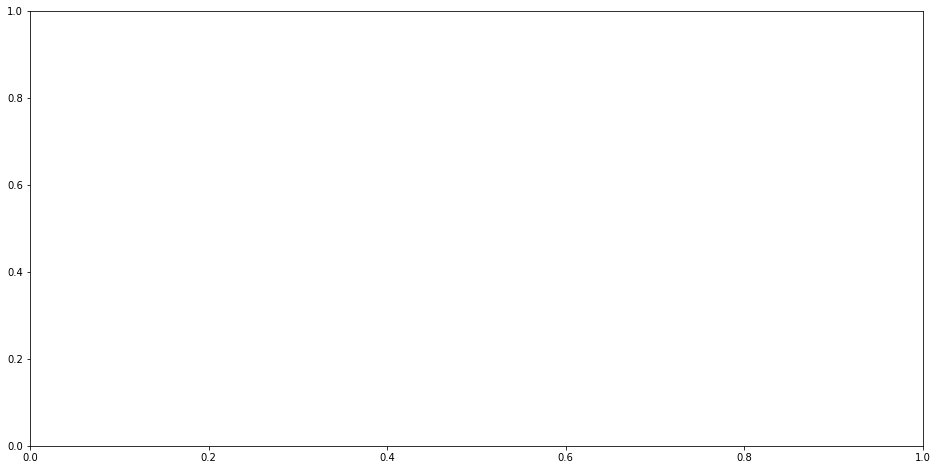

In [74]:
f, (ax1) = plt.subplots(1, 1 ,figsize=(16, 8))
d = np.unique(global_pre_id)
# data = np.asarray(pre_subpops)
# left_of_first_bin = data.min() - float(d)/2
# right_of_last_bin = data.max() + float(d)/2
# plt.hist(data, np.arange(left_of_first_bin, right_of_last_bin + d, d))
ax1.hist(global_pre_id, bins=d.size, edgecolor='black')
plt.savefig("potential_partner_pre_id_16x16.png")

ValueError: `bins` should be a positive integer.

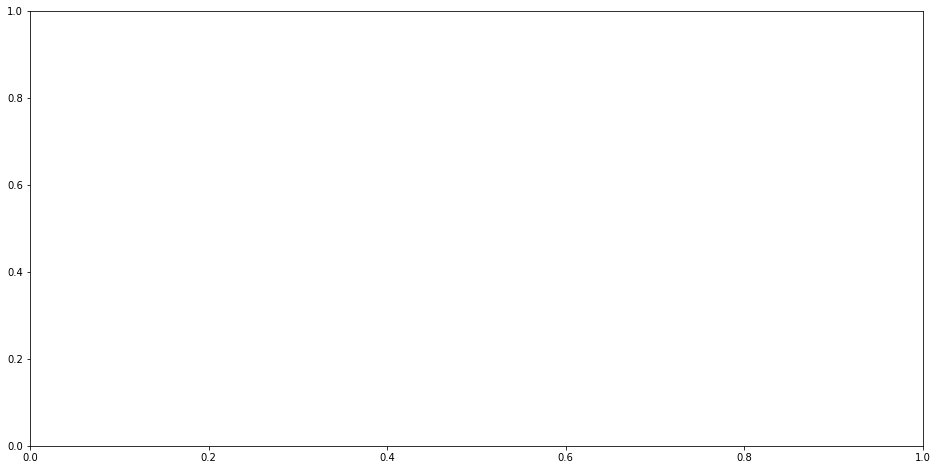

In [75]:
f, (ax1) = plt.subplots(1, 1 ,figsize=(16, 8))
d = np.unique(global_post_id)
# data = np.asarray(pre_subpops)
# left_of_first_bin = data.min() - float(d)/2
# right_of_last_bin = data.max() + float(d)/2
# plt.hist(data, np.arange(left_of_first_bin, right_of_last_bin + d, d))
ax1.hist(global_post_id, bins=d.size, edgecolor='black')
plt.savefig("global_post_ids_16x16.png")

ValueError: `bins` should be a positive integer.

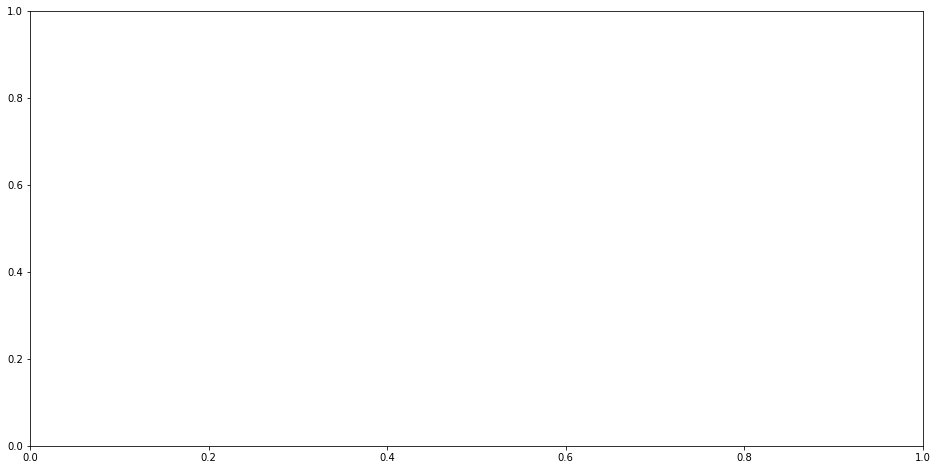

In [76]:
f, (ax1) = plt.subplots(1, 1 ,figsize=(16, 8))
d = np.unique(distance_sq)
# data = np.asarray(pre_subpops)
# left_of_first_bin = data.min() - float(d)/2
# right_of_last_bin = data.max() + float(d)/2
# plt.hist(data, np.arange(left_of_first_bin, right_of_last_bin + d, d))
ax1.hist(distance_sq, bins=d.size,edgecolor='black', normed=1)

In [77]:
dist = np.sqrt(distance_sq)
m = np.mean(dist)
std = np.std(dist)

WARNING    C:\WinPython-64bit-2.7.9.4\python-2.7.9.amd64\lib\site-packages\numpy\core\fromnumeric.py:2909: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
 [py.warnings]
  out=out, **kwargs)

WARNING    C:\WinPython-64bit-2.7.9.4\python-2.7.9.amd64\lib\site-packages\numpy\core\_methods.py:80: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
 [py.warnings]
  ret = ret.dtype.type(ret / rcount)

WARNING    C:\WinPython-64bit-2.7.9.4\python-2.7.9.amd64\lib\site-packages\numpy\core\_methods.py:135: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
 [py.warnings]
  keepdims=keepdims)

WARNING    C:\WinPython-64bit-2.7.9.4\python-2.7.9.amd64\lib\site-packages\numpy\core\_methods.py:105: RuntimeWarning: invalid value encountered in true_divide
  arrmean, rcount, out=arrmean, casting='unsafe', subok=False)
 [py.warnings]
  arrmean, rcount, out=arrmean, casting='unsafe', subok=False)

WARNING    C:\WinPython-64bit-2.7

ValueError: `bins` should be a positive integer.

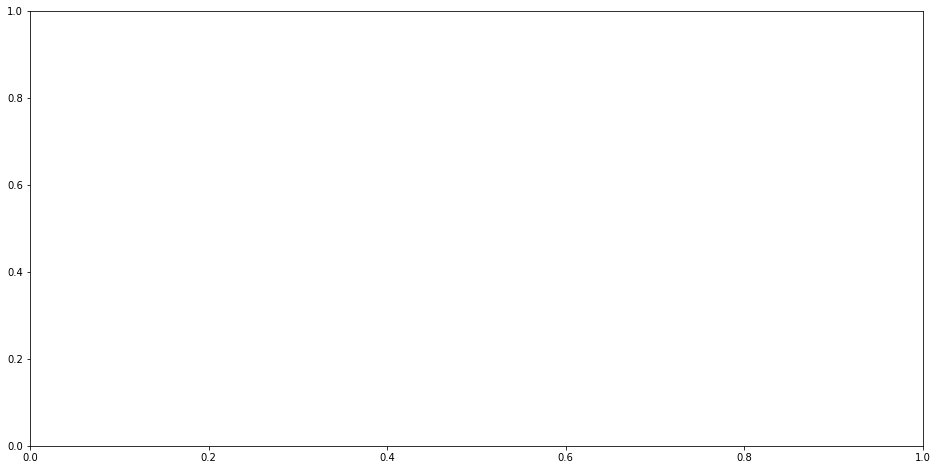

In [78]:
import matplotlib.mlab as mlab
f, (ax1) = plt.subplots(1, 1 ,figsize=(16, 8))
d = np.unique(np.sqrt(distance_sq))
# data = np.asarray(pre_subpops)
# left_of_first_bin = data.min() - float(d)/2
# right_of_last_bin = data.max() + float(d)/2
# plt.hist(data, np.arange(left_of_first_bin, right_of_last_bin + d, d))

n, bins, patches = ax1.hist(np.sqrt(distance_sq), bins=d.size,normed=1, edgecolor='black')
y = mlab.normpdf( bins, m, std)
l = ax1.plot(bins, y, 'r--', linewidth=1)

In [16]:
def distance(x0, x1, grid=np.asarray([16, 16]), type='euclidian'):
    x0 = np.asarray(x0)
    x1 = np.asarray(x1)
    delta = np.abs(x0 - x1)
    delta = np.where(delta > grid * .5, delta - grid, delta)

    if type == 'manhattan':
        return np.abs(delta).sum(axis=-1)
    return np.sqrt((delta ** 2).sum(axis=-1))
def index_to_dist(i1, i2, grid):
    return distance((i1//grid[0], i1%grid[1]),(i2//grid[0], i2%grid[1]), grid=grid, type='euclidian')

In [337]:
layer_size = 256
grid_layout = np.asarray((16, 16))

In [65]:
for i in np.arange(global_post_id.size):
    assert np.round(index_to_dist(global_pre_id[i], global_post_id[i], grid_layout)**2) == distance_sq[i], \
    "{} vs {}".format(np.round(index_to_dist(global_pre_id[i], global_post_id[i], grid_layout)**2),  distance_sq[i])

In [338]:
counts = np.ones((layer_size, layer_size)) * np.nan

In [339]:
for i in np.arange(global_post_id.size):
    if np.isnan(counts[global_pre_id[i], global_post_id[i]]):
        counts[global_pre_id[i], global_post_id[i]] = 1
    else:
        counts[global_pre_id[i], global_post_id[i]] += 1

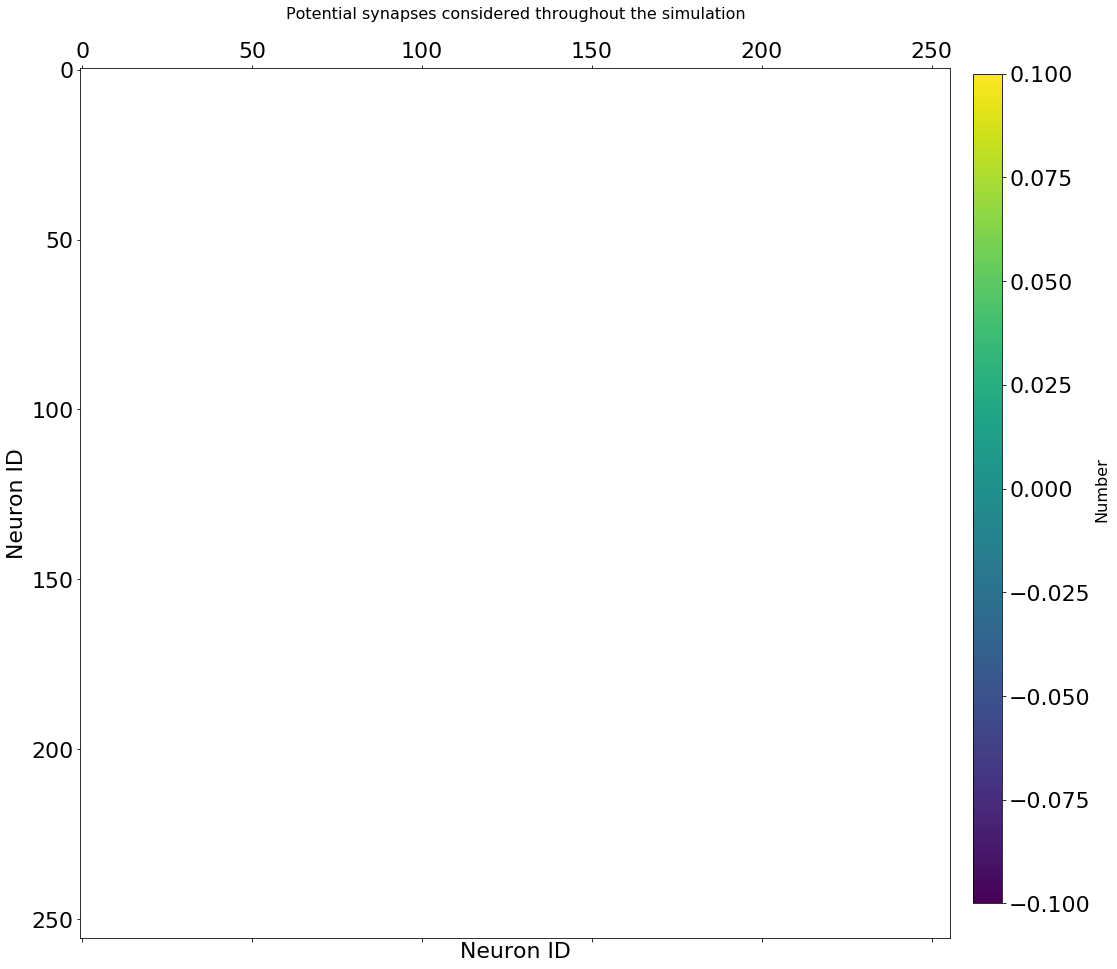

In [340]:
f, (ax1) = plt.subplots(1, 1 ,figsize=(16,16))
i = ax1.matshow(counts, vmin=0)
ax1.grid(visible=False)
ax1.set_title("Potential synapses considered throughout the simulation", fontsize=16)
ax1.set_xlabel("Neuron ID")
ax1.set_ylabel("Neuron ID")
cbar_ax = f.add_axes([.91, 0.155, 0.025, 0.72])
# ax1.set_ylim([20, 0])
# ax1.set_xlim([0, 20])
cbar = f.colorbar(i, cax=cbar_ax)
cbar.set_label("Number", fontsize=16)
plt.savefig("global_mentions_16x16.png")

In [341]:
print "total rewire attempts", np.nansum(counts)

total rewire attempts 0.0


In [342]:
print "hit locations", np.count_nonzero(np.isfinite(counts))

hit locations 0


In [343]:
print "surface coverage", np.count_nonzero(np.isfinite(counts)) * 100. / counts.size 

surface coverage 0.0


In [344]:
elim_prob = np.asarray(elim_prob)
removals= np.asarray(removals)
form_prob= np.asarray(form_prob)
formations = np.asarray(formations)

In [345]:
formation_counts = np.ones((layer_size, layer_size)) * np.nan
for i in np.arange(formations.shape[0]):
    if np.isnan(formation_counts[formations[i, 0], formations[i, 1]]):
        formation_counts[formations[i, 0], formations[i, 1]] = 1
    else:
        formation_counts[formations[i, 0], formations[i, 1]] += 1

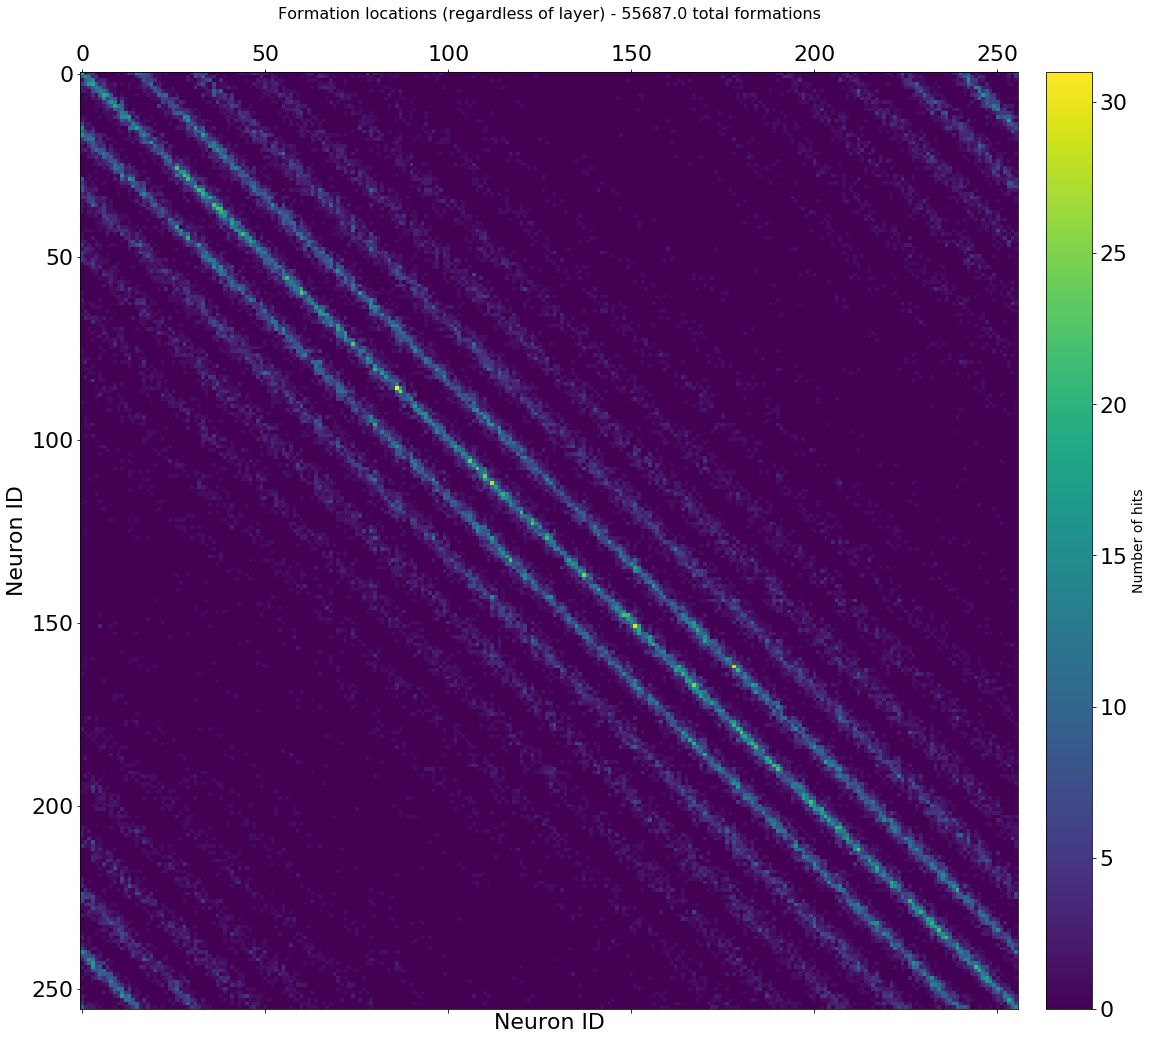

In [346]:
f, (ax1) = plt.subplots(1, 1 ,figsize=(16,16), dpi=400)
i = ax1.matshow(np.nan_to_num(formation_counts), vmin=0)
ax1.grid(visible=False)
ax1.set_title("Formation locations (regardless of layer) - " 
              + str(np.sum(formation_counts[np.isfinite(formation_counts)])) 
              + " total formations" , fontsize=16)
ax1.set_xlabel("Neuron ID")
ax1.set_ylabel("Neuron ID")
# cbar_ax = f.add_axes([.91, 0.155, 0.025, 0.72])
# ax1.set_ylim([20, 0])
# ax1.set_xlim([0, 20])
# cbar = f.colorbar(i, cax=cbar_ax)
# cbar.set_label("Number of hits", fontsize=16)

divider = make_axes_locatable(plt.gca())
cax = divider.append_axes("right", "5%", pad="3%")
cbar = plt.colorbar(i, cax=cax)
cbar.set_label("Number of hits", fontsize=14)
plt.tight_layout(.3)

plt.savefig("form_hits.png")

In [347]:
total_formations = np.sum(formation_counts[np.isfinite(formation_counts)])
print "Total number of formations", total_formations

Total number of formations 55687.0


In [348]:
np.sum(np.isfinite(formation_counts))

19452

In [349]:
deletion_counts = np.ones((layer_size, layer_size)) * np.nan
for i in np.arange(removals.shape[0]):
    if np.isnan(deletion_counts[removals[i, 0], removals[i, 1]]):
        deletion_counts[removals[i, 0], removals[i, 1]] = 1
    else:
        deletion_counts[removals[i, 0], removals[i, 1]] += 1

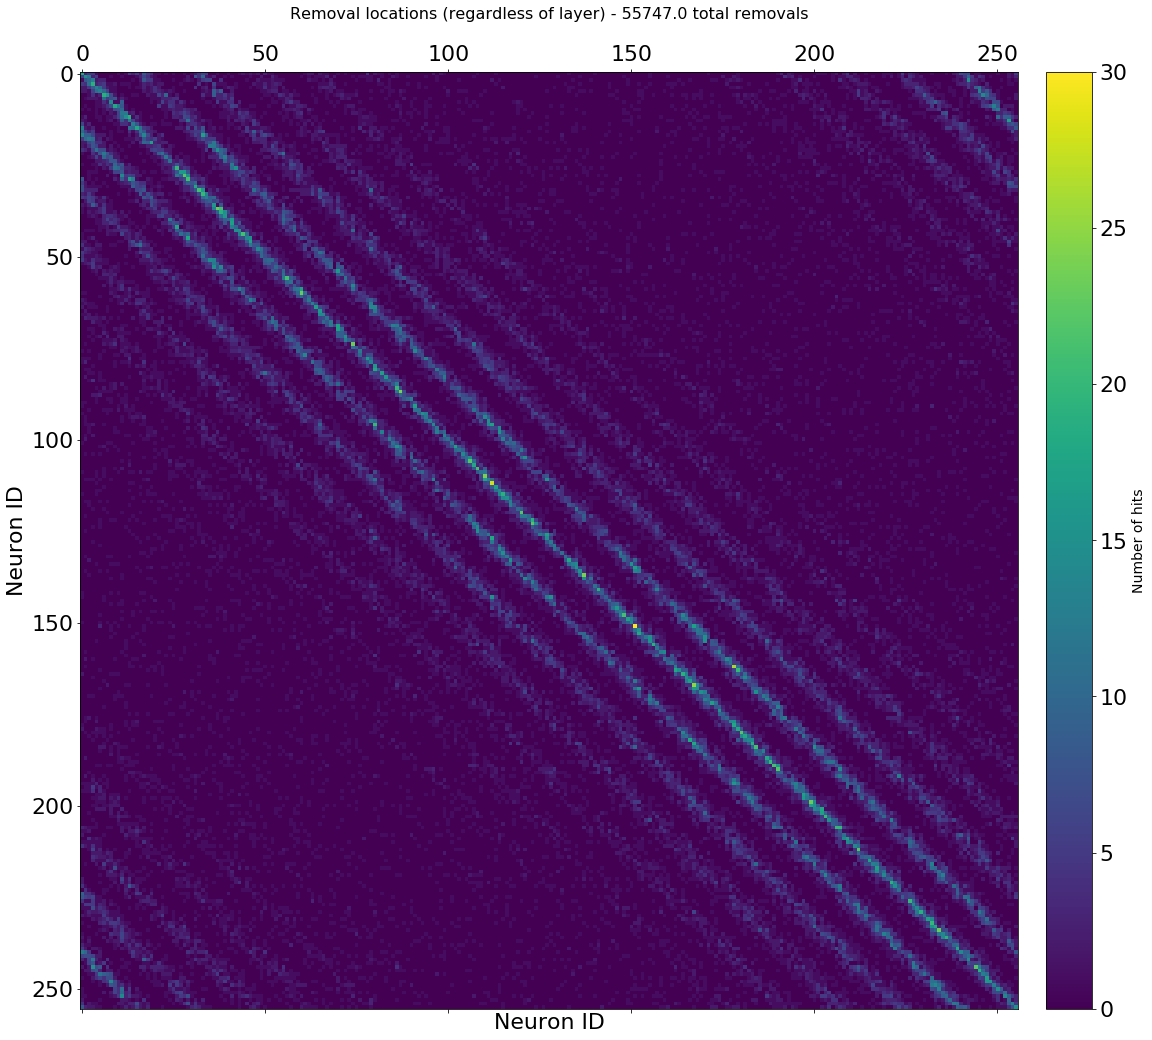

In [350]:
f, (ax1) = plt.subplots(1, 1 ,figsize=(16,16), dpi=400)
i = ax1.matshow(np.nan_to_num(deletion_counts), vmin=0)
ax1.grid(visible=False)
ax1.set_title("Removal locations (regardless of layer) - " 
              + str(np.sum(deletion_counts[np.isfinite(deletion_counts)])) 
              + " total removals" , fontsize=16)
ax1.set_xlabel("Neuron ID")
ax1.set_ylabel("Neuron ID")
divider = make_axes_locatable(plt.gca())
cax = divider.append_axes("right", "5%", pad="3%")
cbar = plt.colorbar(i, cax=cax)
cbar.set_label("Number of hits", fontsize=14)
plt.tight_layout(.3)
plt.savefig("removal_hits.png")

In [351]:
total_removals = np.sum(deletion_counts[np.isfinite(deletion_counts)])
print "Total number of removals", total_removals

Total number of removals 55747.0


In [352]:
np.argmax(deletion_counts[np.isfinite(deletion_counts)])

13951

In [353]:
# What is the probability of removal for a synapse during a 5 minute simulation?
print "Q:What is the probability of removal for a synapse during a 5 minute simulation? A:", total_removals / 300000.
print "Q:What is the probability of adding a synapse during a 5 minute simulation? A:", total_formations / 300000.

Q:What is the probability of removal for a synapse during a 5 minute simulation? A: 0.185823333333
Q:What is the probability of adding a synapse during a 5 minute simulation? A: 0.185623333333


In [25]:
print "Cancer" 
for key in errors.keys():
    print key, len(errors[key])

Cancer


NameError: name 'formation_prob_controls' is not defined

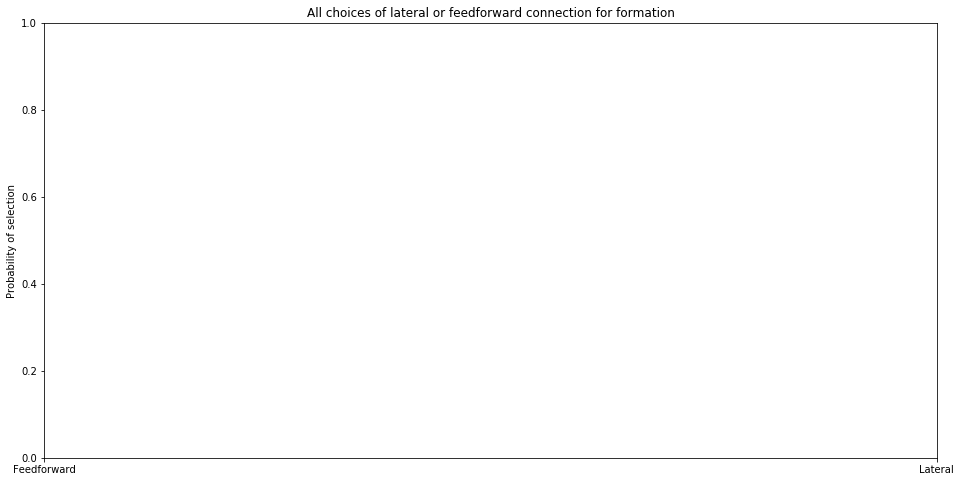

In [56]:
f, (ax1) = plt.subplots(1, 1 ,figsize=(16, 8))
ax1.set_title("All choices of lateral or feedforward connection for formation")
plt.xticks([0, 1], ["Feedforward", "Lateral"])
ax1.set_ylabel("Probability of selection")
d = np.unique(formation_prob_controls)
ax1.hist(formation_prob_controls, bins=np.arange(np.max(d)+2)-.5, edgecolor='black', normed=True)

In [57]:
actual_formation_controls = formations[:, 2]
print actual_formation_controls.shape

 (391L,)


(array([ 0.74168798,  0.25831202]),
 array([-0.5,  0.5,  1.5]),
 <a list of 2 Patch objects>)

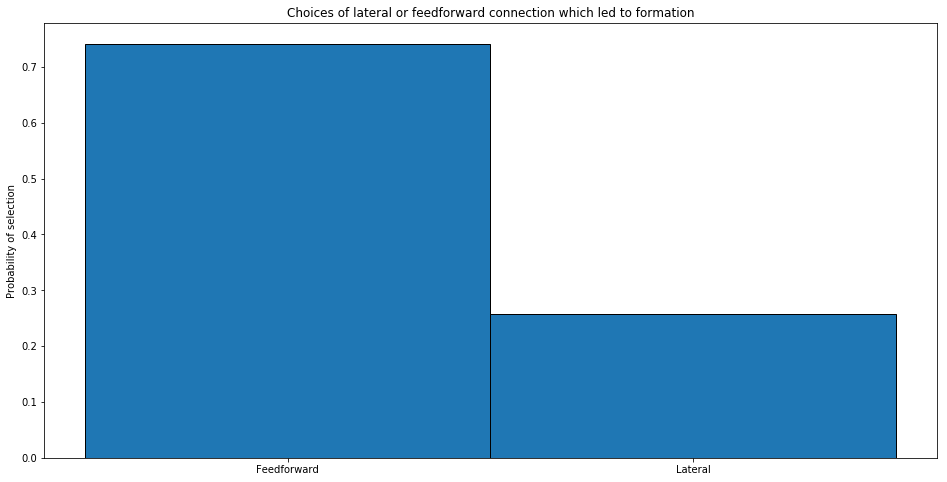

In [58]:
f, (ax1) = plt.subplots(1, 1 ,figsize=(16, 8))
ax1.set_title("Choices of lateral or feedforward connection which led to formation")
plt.xticks([0, 1], ["Feedforward", "Lateral"])
ax1.set_ylabel("Probability of selection")
d = np.unique(actual_formation_controls)
ax1.hist(actual_formation_controls, bins=np.arange(np.max(d)+2)-.5, edgecolor='black', normed=True)

(array([ 0.74168798,  0.25831202]),
 array([-0.5,  0.5,  1.5]),
 <a list of 2 Patch objects>)

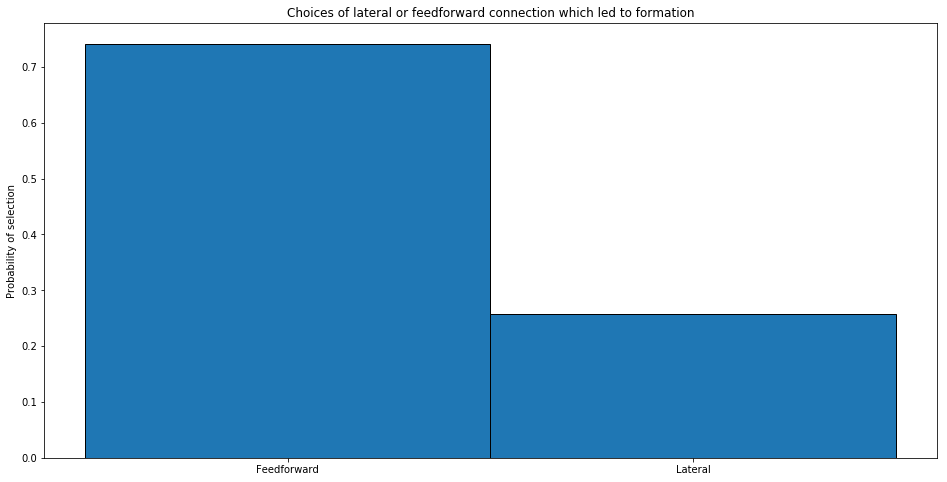

In [59]:
f, (ax1) = plt.subplots(1, 1 ,figsize=(16, 8))
ax1.set_title("Choices of lateral or feedforward connection which led to formation")
plt.xticks([0, 1], ["Feedforward", "Lateral"])
ax1.set_ylabel("Probability of selection")
d = np.unique(actual_formation_controls)
ax1.hist(actual_formation_controls, bins=np.arange(np.max(d)+2)-.5, edgecolor='black', normed=True)

In [60]:
# sanity checks -- the times in rem_fails and form_fails do not repeat and monotonically increase

In [61]:
sorted_rem_fails = np.sort(rem_fails)
assert all(np.diff(sorted_rem_fails) > 0)

In [62]:
sorted_form_fails = np.sort(form_fails)
assert all(np.diff(sorted_form_fails) > 0)

In [63]:
sorted_form_fails[1]

19229

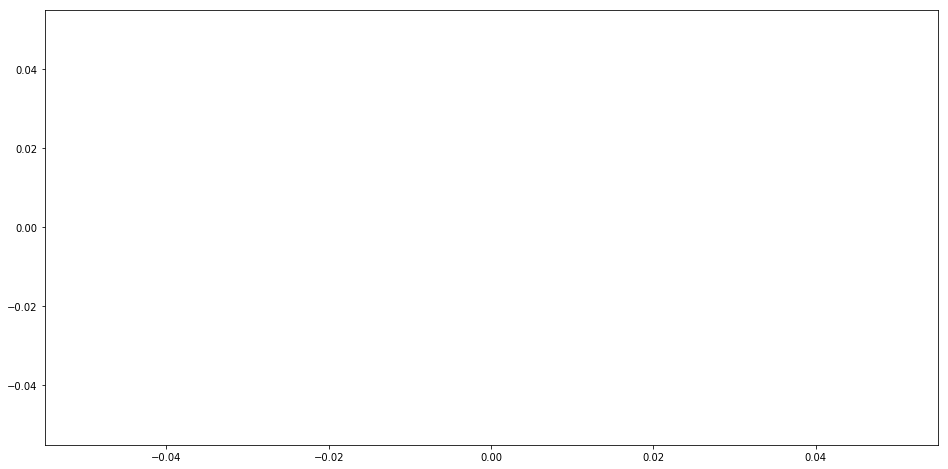

In [64]:
f, (ax1) = plt.subplots(1, 1 ,figsize=(16, 8))
ax1.plot(rem_fails)

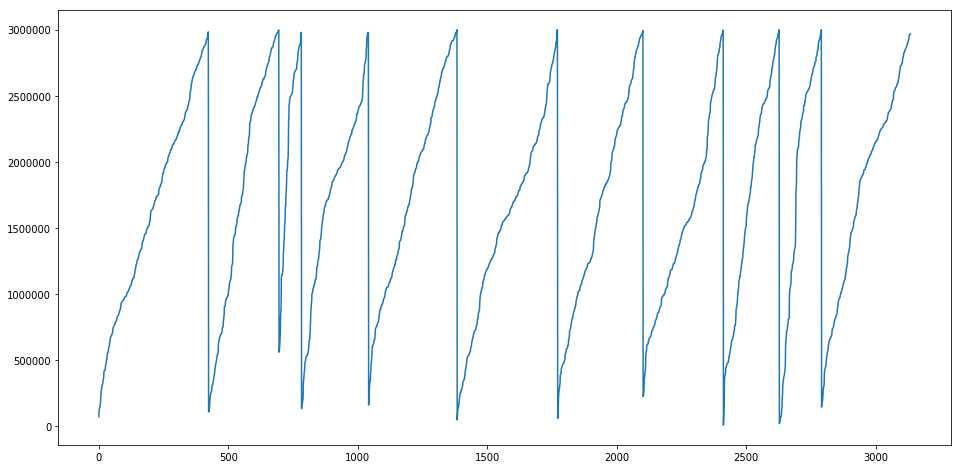

In [65]:
f, (ax1) = plt.subplots(1, 1 ,figsize=(16, 8))
ax1.plot(form_fails)

In [66]:
rem_fails.size 

0

In [67]:
form_fails.size

3135

In [68]:
oob.shape[0]

3135L

In [69]:
total_failures = rem_fails.size  + form_fails.size + oob.shape[0]

In [70]:
print "RM percentage failures of total failures", rem_fails.size * 100. / total_failures

RM percentage failures of total failures 0.0


In [71]:
print "FORM percentage failures of total failures", form_fails.size * 100. / total_failures

FORM percentage failures of total failures 50.0


In [72]:
print "OOB percentage failures of total failures", oob.shape[0] * 100. / total_failures

OOB percentage failures of total failures 50.0


In [73]:
for key in files_based_removals.keys():
    times = np.asarray(files_based_removals[key])
    assert all(np.diff(times) > 0)

In [74]:
for key in files_based_removals.keys():
    times = np.asarray(files_based_formations[key])
    assert all(np.diff(times) > 0)

In [75]:
# check if putting together all times I can reconstruct the entire simulations 
hardcoded_simtime = 30000000
all_times = np.arange(hardcoded_simtime)

In [76]:
assert all(all_times - np.sort(sr_attempts[:,0]) ==0)
assert all(np.diff(np.sort(sr_attempts[:,0])) > 0)

ValueError: operands could not be broadcast together with shapes (30000000,) (2999967,) 

In [37]:
sr_attempts.shape

(0L,)

In [38]:
total_rewiring_attempts = sr_attempts.shape[0]

In [39]:
print "Successful removals of total rewiring attempts", (removals.shape[0] * 100.) / total_rewiring_attempts

Successful removals of total rewiring attempts

ZeroDivisionError: float division by zero

In [40]:
print "Successful formations of total rewiring attempts", formations.shape[0] * 100. / total_rewiring_attempts

 Successful formations of total rewiring attempts

ZeroDivisionError: float division by zero

In [41]:
print "Total percentage of failure to rewire:", total_failures * 100. / total_rewiring_attempts

 Total percentage of failure to rewire:

NameError: name 'total_failures' is not defined

(array([ 0.46759848,  0.        ,  0.53240152]),
 array([-0.5,  0.5,  1.5,  2.5]),
 <a list of 3 Patch objects>)

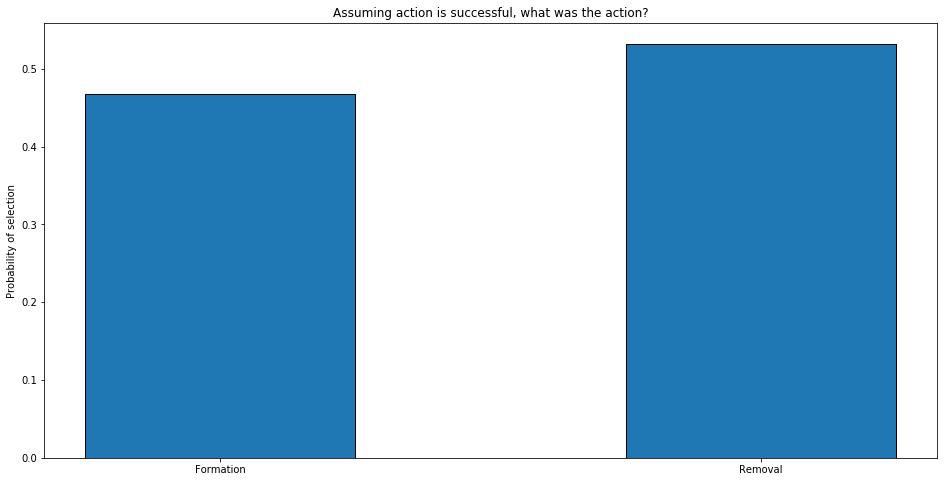

In [42]:
f, (ax1) = plt.subplots(1, 1 ,figsize=(16, 8))
wombo_combo = np.concatenate((np.zeros(formations.shape[0]), np.ones(removals.shape[0])))
ax1.set_title("Assuming action is successful, what was the action?")
plt.xticks([0, 2], ["Formation", "Removal"])
ax1.set_ylabel("Probability of selection")
d = np.unique(wombo_combo*2)
ax1.hist(wombo_combo*2, bins=np.arange(np.max(d)+2)-.5, edgecolor='black', normed=True)

In [43]:
# Plot selection counts per connection type

In [44]:
ff_formations = formations[formations[:,2] == 0]
lat_formations = formations[formations[:,2] == 1]

In [45]:
ff_removals = removals[removals[:,2] == 0]
lat_removals = removals[removals[:,2] == 1]

In [46]:
kek = [ff_formations, lat_formations, ff_removals, lat_removals]
silly_list = np.array([])
i=0
for k in kek:
    print k.shape
    silly_list = np.concatenate((silly_list, np.ones(k.shape[0]) * i))
    i += 1

(282L, 4L)
(86L, 4L)
(203L, 4L)
(216L, 4L)


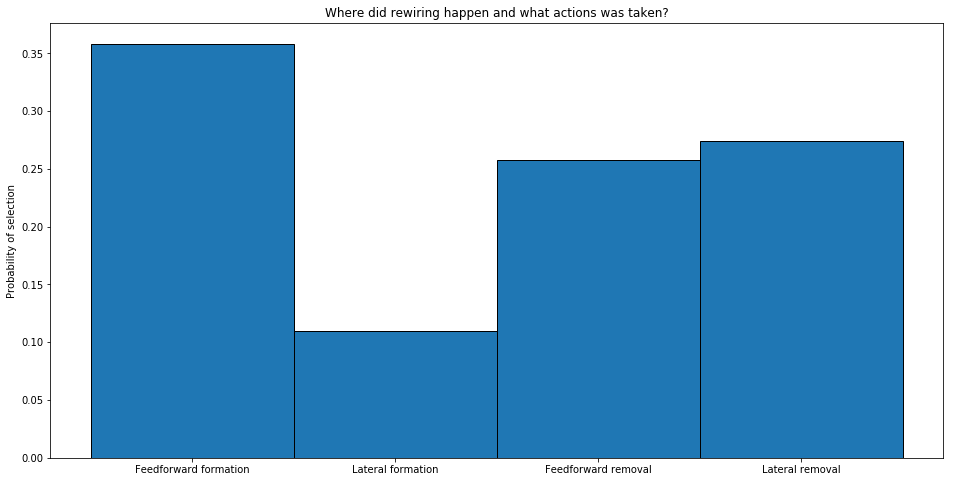

In [74]:
f, (ax1) = plt.subplots(1, 1 ,figsize=(16, 8))
ax1.set_title("Where did rewiring happen and what actions was taken?")
d = np.unique(silly_list)
plt.xticks(np.arange(np.max(d)+2), ["Feedforward formation", "Lateral formation", "Feedforward removal", "Lateral removal"])
ax1.set_ylabel("Probability of selection")
ax1.hist(silly_list, bins=np.arange(np.max(d)+2)-.5, edgecolor='black', normed=True)
plt.savefig("rewire_hist.png")

IndexError: too many indices for array

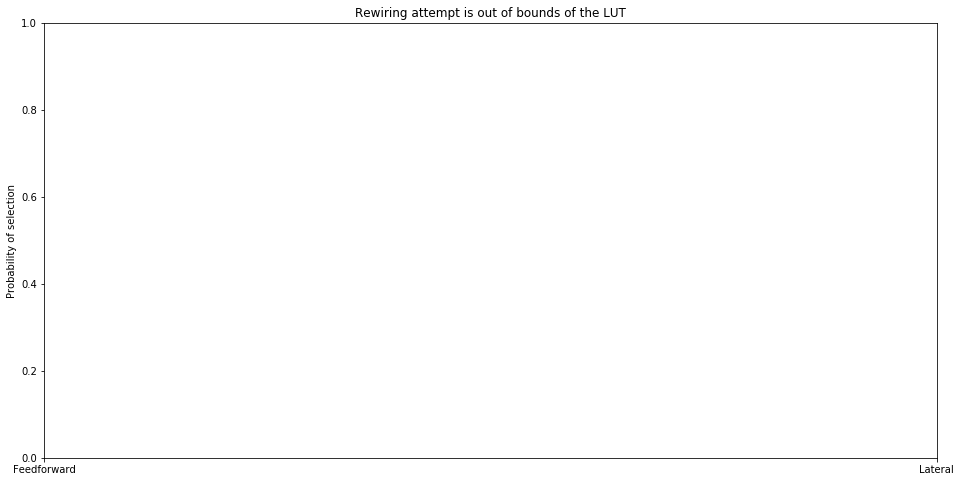

In [48]:
f, (ax1) = plt.subplots(1, 1 ,figsize=(16, 8))
ax1.set_title("Rewiring attempt is out of bounds of the LUT")
plt.xticks([0, 2], ["Feedforward", "Lateral"])
ax1.set_ylabel("Probability of selection")
d = np.unique(oob[:, 2]*2)
ax1.hist(oob[:, 2]*2, bins=np.arange(np.max(d)+2)-.5, edgecolor='black', normed=True)

In [314]:
print "out of a total of", oob.shape[0], " occurances of oob, ", np.count_nonzero(oob[:, 2]==1), " have been from lateral connections"
print "that is",  np.count_nonzero(oob[:, 2]==1) * 100. / oob.shape[0], "%"

out of a total of 0  occurances of oob, 

IndexError: too many indices for array

In [315]:
ff_dists = np.sqrt(dist_sq_control[dist_sq_control[:, 1] == 0])[:, 0]
lat_dists = np.sqrt(dist_sq_control[dist_sq_control[:, 1] == 1])[:, 0]
print "dist_sq_control size", dist_sq_control.shape[0]
print "ff_dists size", ff_dists.shape[0]
print "lat_dists size", lat_dists.shape[0]
print "ff + lat dist size", ff_dists.shape[0] + lat_dists.shape[0]
# dist_sq_control

 dist_sq_control size 2992863
ff_dists size 2443463
lat_dists size 549400
ff + lat dist size 2992863


In [316]:
# combine presynaptic app with subpop
# f, (ax1) = plt.subplots(1, 1 ,figsize=(16, 8))
# combo = np.concatenate((lat_dists * 100, ff_dists))

# d = np.unique(combo)
# ax1.hist(combo, bins=np.arange(np.max(combo)+2)-.5, edgecolor='black')
# ax1.set_xlabel("Feedforward distances {:110s} Lateral distances".format(' '))
# plt.xticks(np.concatenate((np.unique(combo[combo < np.mean(combo)]), np.unique(combo[combo > np.mean(combo)]))), np.concatenate((np.unique(combo[combo < np.mean(combo)]), np.unique(combo[combo > np.mean(combo)])-np.min(combo[combo > np.mean(combo)]))))

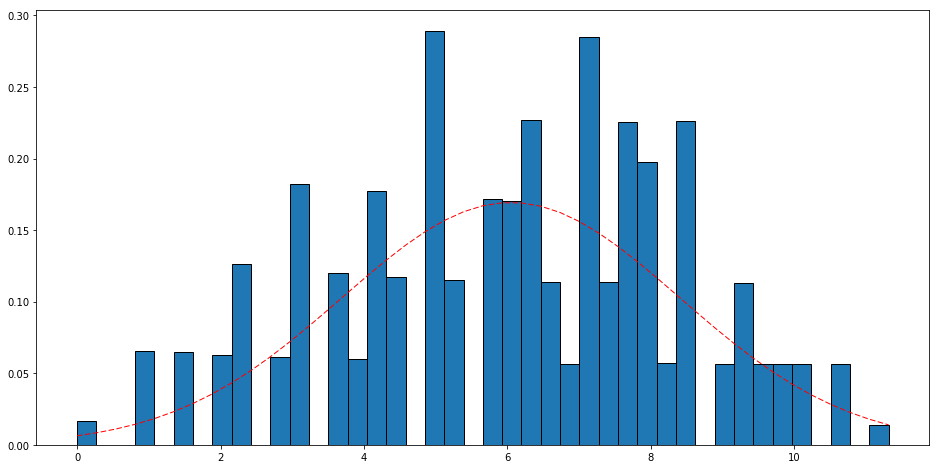

In [317]:
import matplotlib.mlab as mlab
f, (ax1) = plt.subplots(1, 1 ,figsize=(16, 8))
d = np.unique(ff_dists)
# data = np.asarray(pre_subpops)
# left_of_first_bin = data.min() - float(d)/2
# right_of_last_bin = data.max() + float(d)/2
# plt.hist(data, np.arange(left_of_first_bin, right_of_last_bin + d, d))

n, bins, patches = ax1.hist(ff_dists, bins=d.size,normed=1, edgecolor='black')
y = mlab.normpdf( bins, m, std)
l = ax1.plot(bins, y, 'r--', linewidth=1)

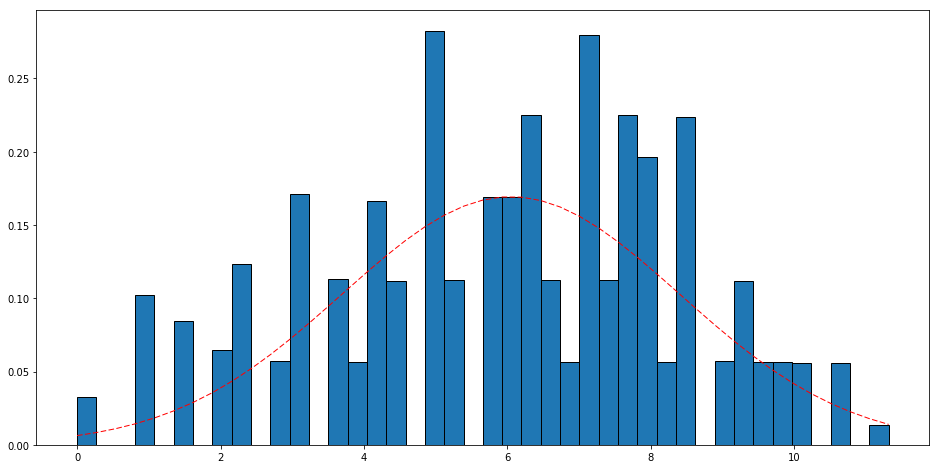

In [318]:
import matplotlib.mlab as mlab
f, (ax1) = plt.subplots(1, 1 ,figsize=(16, 8))
d = np.unique(lat_dists)
# data = np.asarray(pre_subpops)
# left_of_first_bin = data.min() - float(d)/2
# right_of_last_bin = data.max() + float(d)/2
# plt.hist(data, np.arange(left_of_first_bin, right_of_last_bin + d, d))

n, bins, patches = ax1.hist(lat_dists, bins=d.size,normed=1, edgecolor='black')
y = mlab.normpdf( bins, m, std)
l = ax1.plot(bins, y, 'r--', linewidth=1)

IndexError: too many indices for array

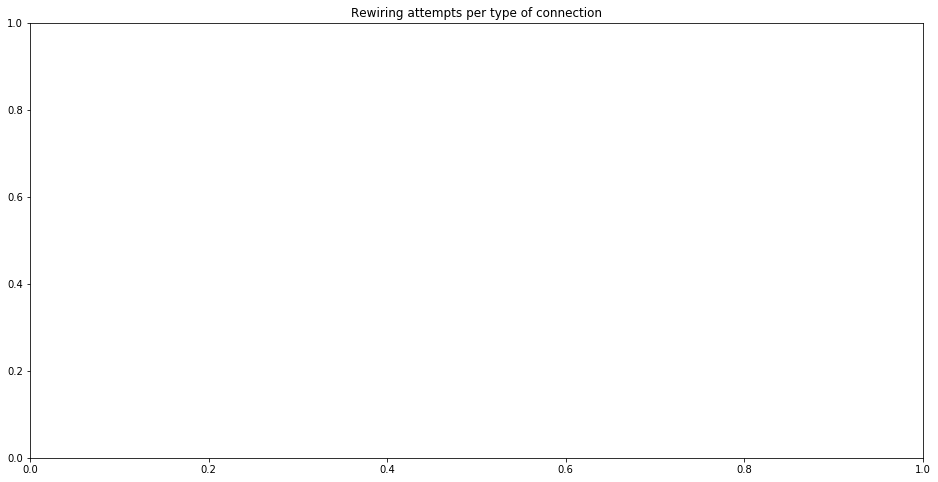

In [49]:
f, (ax1) = plt.subplots(1, 1 ,figsize=(16, 8))
ax1.set_title("Rewiring attempts per type of connection")
d = np.unique(sr_attempts[:,1])
plt.xticks(d+.5, ["Feedforward attempts", "Lateral attempts"])
ax1.set_ylabel("Probability of attempt")
ax1.hist(sr_attempts[:,1], bins=d.size, edgecolor='black', normed=True, range=(0, 2))

In [320]:
oob

array([], dtype=float64)

In [321]:
sr_attempts.shape[0]

2992863L

In [322]:
sr_attempts[:,2]

array([1, 1, 1, ..., 0, 0, 0])

In [323]:
existence = np.zeros(2)

In [324]:
for e in sr_attempts[:,2]:
    existence[e] += 1

In [325]:
existence

array([ 2913373.,    79490.])

In [326]:
plt.bar(existence)

TypeError: bar() takes at least 2 arguments (1 given)

In [190]:
# plot error appearance over time and show how rewires are affected by this
errors.keys()

['[ERROR]   (topographic_map_impl.c: 556): row is full\n']

In [41]:
fail_times = errors['[ERROR]   (topographic_map_impl.c: 491): FAIL Search\n']

(array([  1.,   1.,   5.,   2.,   5.,   3.,   4.,   3.,   7.,   5.,   6.,
          7.,   5.,  10.,  13.,  11.,   8.,  16.,  12.,   9.,  12.,   8.,
         13.,  15.,  14.,  14.,  19.,  15.,   8.,  13.,  13.,  17.,  19.,
         17.,  20.,  16.,  25.,  17.,  16.,  16.,  19.,  18.,  17.,  14.,
         25.,  14.,  19.,  27.,  27.,  21.,  21.,  25.,  22.,  27.,  26.,
         17.,  23.,  17.,  19.,  26.,  20.,  17.,  27.,  27.,  32.,  26.,
         18.,  27.,  27.,  24.,  29.,  31.,  26.,  31.,  26.,  22.,  26.,
         21.,  25.,  30.,  26.,  30.,  22.,  22.,  26.,  28.,  27.,  31.,
         23.,  30.,  35.,  35.,  23.,  18.,  26.,  30.,  27.,  21.,  34.,
         29.]),
 array([   85977.  ,   115102.63,   144228.26,   173353.89,   202479.52,
          231605.15,   260730.78,   289856.41,   318982.04,   348107.67,
          377233.3 ,   406358.93,   435484.56,   464610.19,   493735.82,
          522861.45,   551987.08,   581112.71,   610238.34,   639363.97,
          668489.6 ,   697

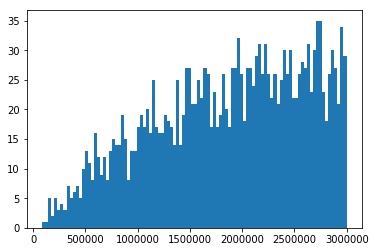

In [332]:
plt.hist(formations[:, -1], 3000000/30000)

(array([ 10.,  11.,   9.,   6.,   7.,   9.,  12.,   6.,  11.,   9.,  10.,
          5.,   8.,   5.,   8.,   6.,   8.,   4.,   4.,   8.,   7.,   4.,
          9.,   6.,  10.,  12.,  10.,   3.,  10.,   7.,   1.,   6.,  11.,
          9.,   3.,   7.,   8.,   8.,   5.,  13.,   6.,   7.,   6.,   6.,
          9.,   7.,   7.,  11.,   5.,  10.,  10.,   6.,   6.,   4.,   8.,
          8.,   2.,   7.,   4.,  10.,   4.,   3.,   7.,  11.,   4.,  11.,
          6.,   6.,   7.,  11.,   9.,   5.,  11.,   6.,   5.,   9.,   8.,
          9.,   5.,   4.,   9.,  10.,   8.,   7.,   7.,   7.,   7.,  12.,
          5.,   8.,   7.,   6.,   9.,   5.,   8.,   5.,   9.,   5.,   7.,
          8.,   7.,   7.,   8.,   7.,   7.,   2.,   6.,   6.,   5.,   8.,
          5.,   6.,  11.,   4.,   7.,   7.,   6.,   5.,   6.,   4.,   9.,
          3.,   2.,  10.,   3.,   5.,   6.,   5.,   6.,   6.,   6.,   5.,
          5.,   5.,   6.,   6.,   5.,   4.,   7.,   7.,   7.,   9.,   7.,
          4.,   8.,   7.,  11.,   6., 

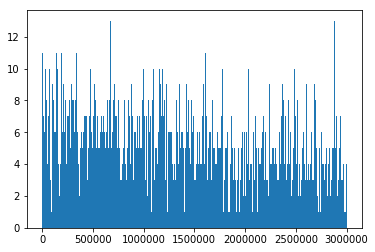

In [333]:
plt.hist(removals[:, -1], 30000000/30000)

(array([ 563.,  474.,  450.,  462.,  470.,  487.,  437.,  459.,  466.,
         456.,  478.,  481.,  475.,  455.,  479.,  440.,  462.,  480.,
         507.,  457.,  480.,  495.,  459.,  500.,  466.,  479.,  501.,
         474.,  501.,  490.,  495.,  486.,  508.,  522.,  549.,  523.,
         546.,  560.,  523.,  545.,  570.,  598.,  518.,  568.,  554.,
         601.,  556.,  578.,  579.,  572.,  586.,  611.,  601.,  633.,
         609.,  624.,  627.,  636.,  627.,  623.,  591.,  560.,  611.,
         586.,  656.,  589.,  593.,  611.,  561.,  559.,  615.,  612.,
         629.,  646.,  589.,  607.,  627.,  580.,  637.,  621.,  600.,
         630.,  610.,  639.,  571.,  637.,  614.,  627.,  614.,  581.,
         616.,  581.,  599.,  602.,  605.,  633.,  634.,  591.,  596.,  616.]),
 array([  1.11000000e+02,   1.21098600e+04,   2.41087200e+04,
          3.61075800e+04,   4.81064400e+04,   6.01053000e+04,
          7.21041600e+04,   8.41030200e+04,   9.61018800e+04,
          1.08100740e+05

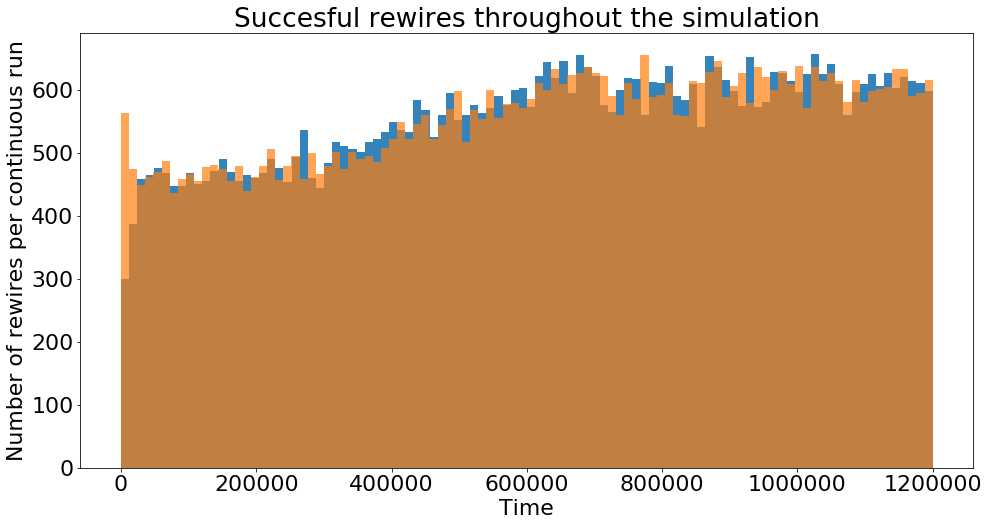

In [354]:
f, (ax1) = plt.subplots(1, 1 ,figsize=(16, 8))
ax1.set_title("Succesful rewires throughout the simulation")
ax1.set_ylabel("Number of rewires per continuous run")
ax1.set_xlabel("Time")
ax1.hist(removals[:, -1], int(3000000/30000), alpha=.9)
ax1.hist(formations[:, -1], int(3000000/30000), alpha=.7)

In [355]:
mlib.rcParams.update({'font.size': 20})

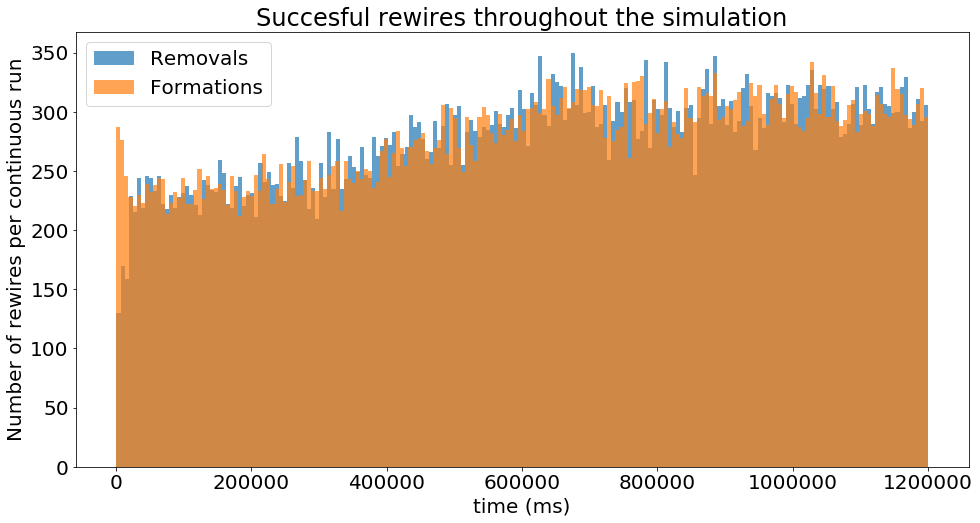

In [356]:
f, (ax1) = plt.subplots(1, 1 ,figsize=(16, 8), dpi=600)
ax1.set_title("Succesful rewires throughout the simulation")
ax1.set_ylabel("Number of rewires per continuous run")
ax1.set_xlabel("time (ms)")
ax1.set_zorder(2)
# ax2 = ax1.twinx()
# ax2.set_ylabel("Number of failures per continuous run")
nr, binsr, patchesr = ax1.hist(removals[:, -1]  , int(600000/3000), alpha=.7, zorder=8, label="Removals")
nf, binsf, patchesf = ax1.hist(formations[:, -1], int(600000/3000), alpha=.7, zorder=9, label="Formations")
# ax2.hist(fail_times, int(3000000/30000),color='r', zorder=1, alpha=.7, label="Failures")
# ax2.set_zorder(1)

h1, l1 = ax1.get_legend_handles_labels()
# h2, l2 = ax2.get_legend_handles_labels()
ax1.legend(h1, l1, loc='best')
plt.savefig('succesful_rewires.png')

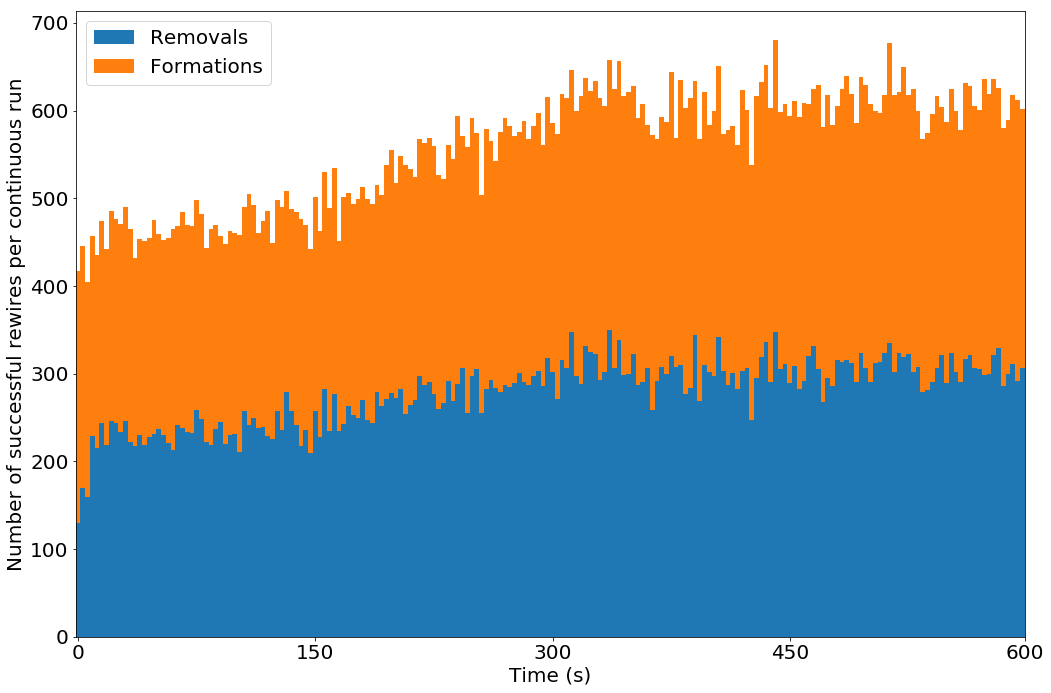

In [375]:
f, (ax1) = plt.subplots(1, 1 ,figsize=(15, 10), dpi=600)
# ax1.set_title("Succesful rewires throughout the simulation")
ax1.set_ylabel("Number of successful rewires per continuous run")
ax1.set_xlabel("Time (s)")
ax1.set_zorder(2)
# ax2 = ax1.twinx()
# ax2.set_ylabel("Number of failures per continuous run")
w = 1.
ax1.bar(range(binsr.size-1),nr, label="Removals", width=w)#, color='#414C82')
ax1.bar(range(binsf.size-1),nf, label="Formations", bottom=nr, width=w)#, color='#A3DC37')
# ax2.hist(fail_times, int(3000000/30000),color='r', zorder=1, alpha=.7, label="Failures")
# ax2.set_zorder(1)

# ax1.set_xticklabels(((np.arange(binsf.size))-1)*200./3*second)
ax1.set_xticks([0, 50, 100, 150, 199.5])
ax1.set_xticklabels([0, 150, 300, 450, 600])
ax1.set_xlim([-.5, 199.5])
# ax1.set_ylim([0, 600])
h1, l1 = ax1.get_legend_handles_labels()
# h2, l2 = ax2.get_legend_handles_labels()
ax1.legend(h1, l1, loc='best')

plt.tight_layout()
plt.savefig('succesful_rewires_stacked_barchart.png')

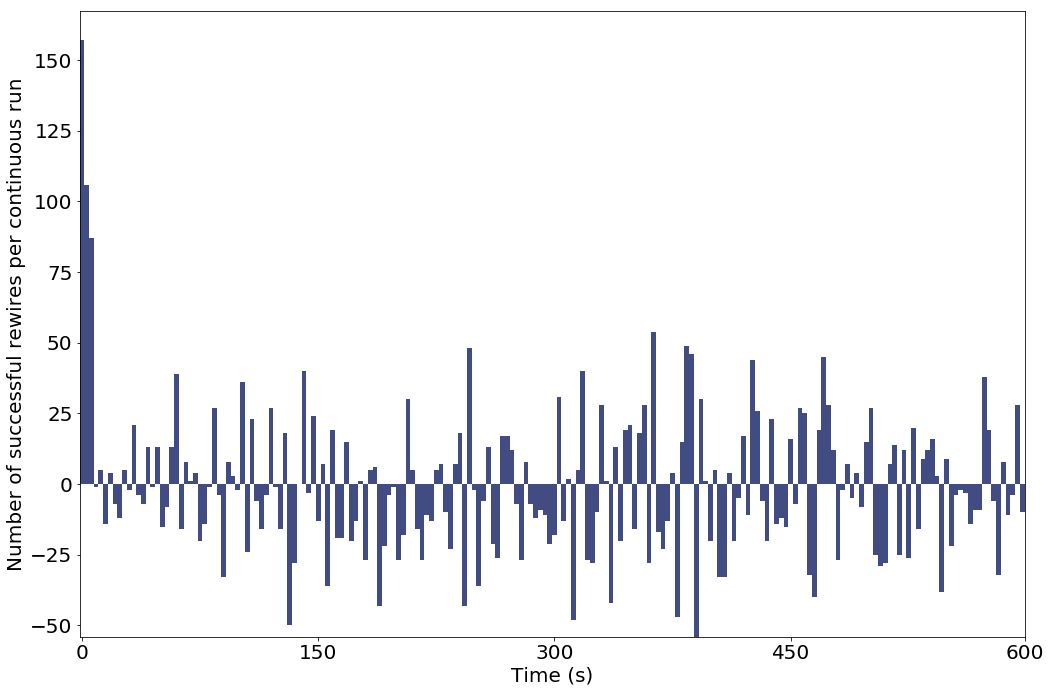

In [376]:
f, (ax1) = plt.subplots(1, 1 ,figsize=(15, 10), dpi=600)
# ax1.set_title("Succesful rewires throughout the simulation")
ax1.set_ylabel("Number of successful rewires per continuous run")
ax1.set_xlabel("Time (s)")
ax1.set_zorder(2)
# ax2 = ax1.twinx()
# ax2.set_ylabel("Number of failures per continuous run")
w = 1.
ax1.bar(range(binsr.size-1),nf-nr, width=w, color='#414C82')
# ax1.bar(range(binsf.size-1),nf, label="Formations", bottom=nr, width=w)#, color='#A3DC37')
# ax2.hist(fail_times, int(3000000/30000),color='r', zorder=1, alpha=.7, label="Failures")
# ax2.set_zorder(1)

# ax1.set_yscale('symlog' )
# ax1.set_xticklabels(((np.arange(binsf.size))-1)*200./3*second)
ax1.set_xticks([0, 50, 100, 150, 199.5])
ax1.set_xticklabels([0, 150, 300, 450, 600])
ax1.set_xlim([-.5, 199.5])
# ax1.set_ylim([0, 600])
h1, l1 = ax1.get_legend_handles_labels()
# h2, l2 = ax2.get_legend_handles_labels()
# ax1.legend(h1, l1, loc='best')

plt.tight_layout()
plt.savefig('net_effect_of_rewiring.png')

In [359]:
net_effect = nf-nr
initial_connectivity = np.ones(256) * 0
total_net_effect = np.sum(net_effect) + np.sum(initial_connectivity)
print "Total synapses", total_net_effect
print "Percentage of all to all connecitivty", (total_net_effect*100.) / (256**2) 
print "Average fan-in", total_net_effect / 256.
cumsum = np.cumsum(nf-nr)
print "size of cumsum", cumsum.shape
print "cumsum after 30 seconds", cumsum[9]
print "First crossing of 10%", .1*(256**2),np.argwhere(cumsum>=.1*(256**2))[0] * 3 * second
print "First crossing of 6k synapses", np.argwhere(cumsum>=6000)[0] * 3 * second
print "First crossing of 9%", .09*(256**2),np.argwhere(cumsum>=.09*(256**2))[0] * 3 * second

Total synapses -60.0
Percentage of all to all connecitivty -0.091552734375
Average fan-in -0.234375
size of cumsum (200L,)
cumsum after 30 seconds 330.0
First crossing of 10% 6553.6

IndexError: index 0 is out of bounds for axis 0 with size 0

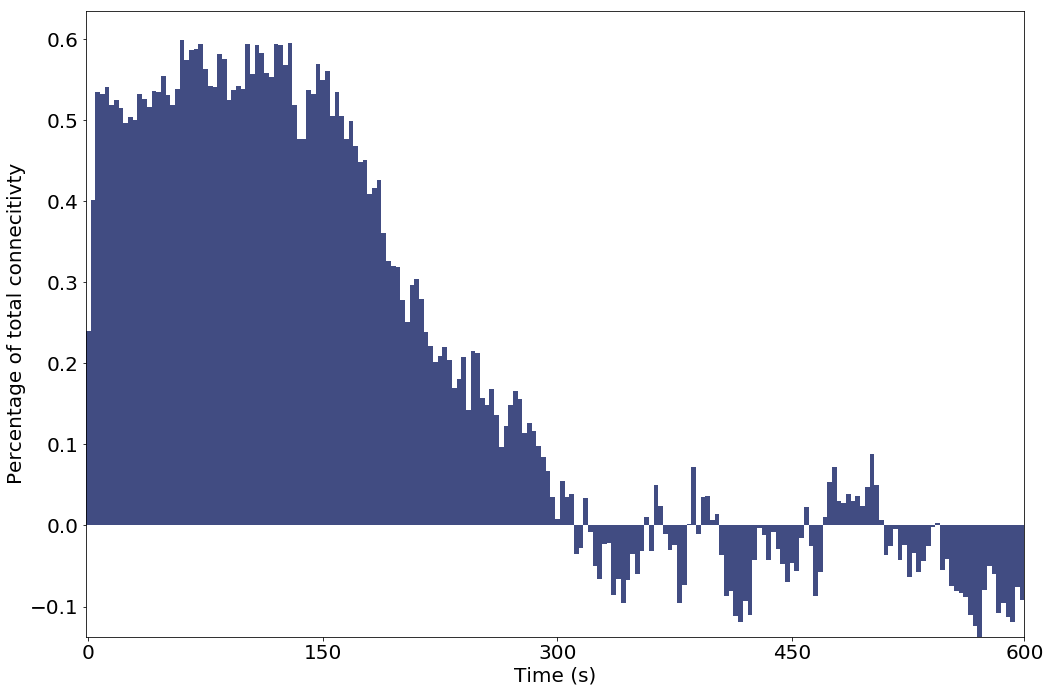

In [372]:
f, (ax1) = plt.subplots(1, 1 ,figsize=(15, 10), dpi=600)
# ax1.set_title("Succesful rewires throughout the simulation")
ax1.set_ylabel("Percentage of total connecitivty")
ax1.set_xlabel("Time (s)")
ax1.set_zorder(2)
# ax2 = ax1.twinx()
# ax2.set_ylabel("Number of failures per continuous run")
w = 1.
ax1.bar(range(binsr.size-1),(np.cumsum(nf-nr) + np.sum(initial_connectivity))*100./(256**2) , width=w, color='#414C82')
# ax1.bar(range(binsf.size-1),nf, label="Formations", bottom=nr, width=w)#, color='#A3DC37')
# ax2.hist(fail_times, int(3000000/30000),color='r', zorder=1, alpha=.7, label="Failures")
# ax2.set_zorder(1)
# ax1.set_xticklabels(((np.arange(binsf.size))-1)*200./3*second)
ax1.set_xticks([0, 50, 100, 150, 199.5])
ax1.set_xticklabels([0, 150, 300, 450, 600])

ax1.set_xlim([-.5, 199.5])
# ax1.set_ylim([0, 600])
h1, l1 = ax1.get_legend_handles_labels()
# h2, l2 = ax2.get_legend_handles_labels()
# ax1.legend(h1, l1, loc='best')

plt.tight_layout()
plt.savefig('percentage_of_connectivity_evolution.png')

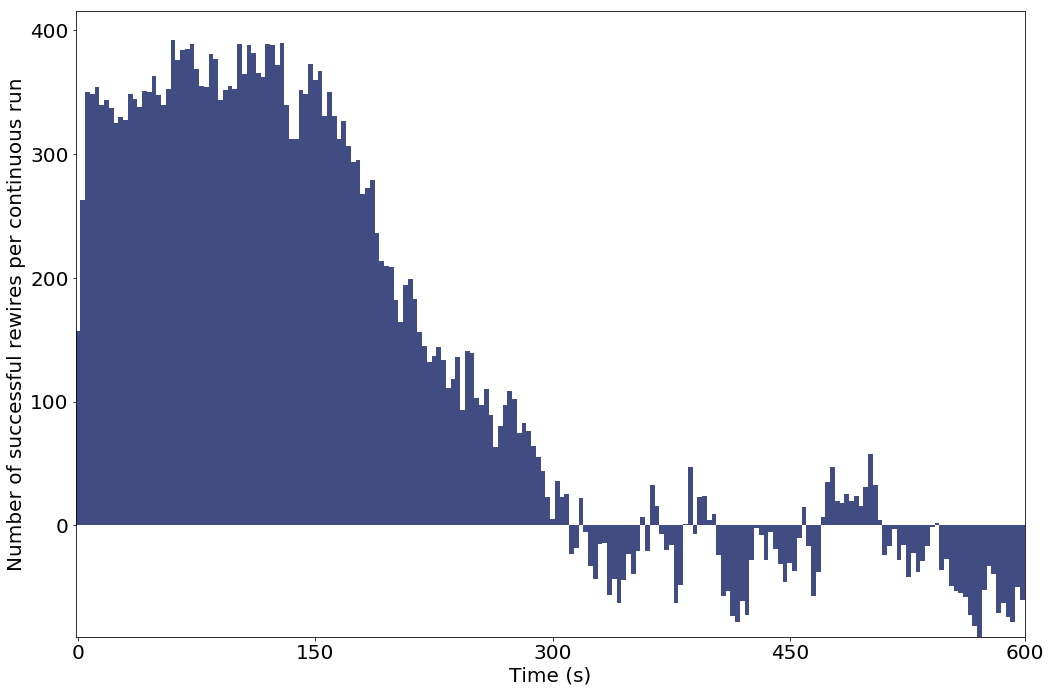

In [377]:
f, (ax1) = plt.subplots(1, 1 ,figsize=(15, 10), dpi=600)
# ax1.set_title("Succesful rewires throughout the simulation")
ax1.set_ylabel("Number of successful rewires per continuous run")
ax1.set_xlabel("Time (s)")
ax1.set_zorder(2)
# ax2 = ax1.twinx()
# ax2.set_ylabel("Number of failures per continuous run")
w = 1.
ax1.bar(range(binsr.size-1),np.cumsum(nf-nr) + np.sum(initial_connectivity), width=w, color='#414C82')
# ax1.bar(range(binsf.size-1),nf, label="Formations", bottom=nr, width=w)#, color='#A3DC37')
# ax2.hist(fail_times, int(3000000/30000),color='r', zorder=1, alpha=.7, label="Failures")
# ax2.set_zorder(1)
# ax1.set_xticklabels(((np.arange(binsf.size))-1)*200./3*second)
ax1.set_xticks([0, 50, 100, 150, 199.5])
ax1.set_xticklabels([0, 150, 300, 450, 600])
ax1.set_xlim([-.5, 199.5])
# ax1.set_ylim([0, 600])
h1, l1 = ax1.get_legend_handles_labels()
# h2, l2 = ax2.get_legend_handles_labels()
# ax1.legend(h1, l1, loc='best')

plt.tight_layout()
plt.savefig('net_effect_of_rewiring_integrated.png')

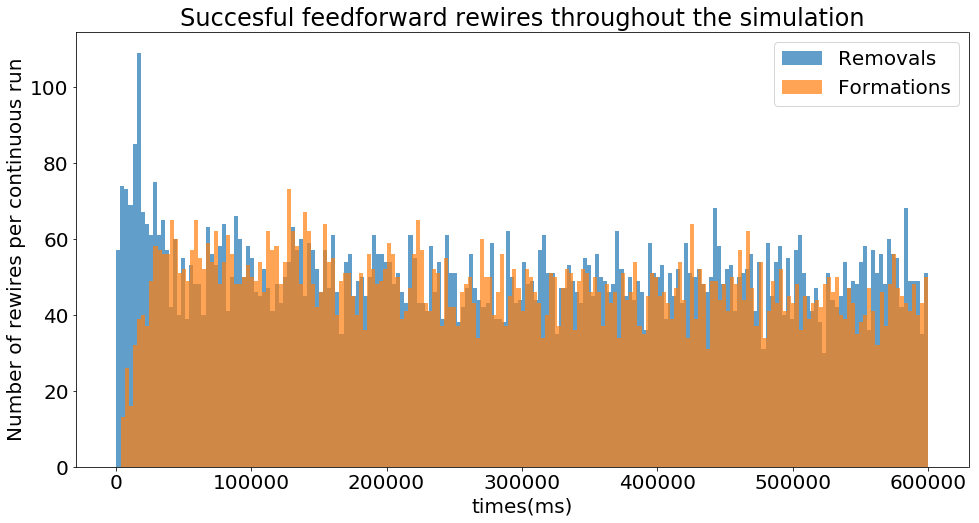

In [222]:
f, (ax1) = plt.subplots(1, 1 ,figsize=(16, 8))
ax1.set_title("Succesful feedforward rewires throughout the simulation")
ax1.set_ylabel("Number of rewires per continuous run")
ax1.set_xlabel("times(ms)")
ax1.set_zorder(2)
# ax2.set_ylabel("Number of failures per continuous run")
ax1.hist(removals[removals[:,2]==0][:, -1]  , int(600000/3000), alpha=.7, zorder=8, label="Removals")
ax1.hist(formations[formations[:,2]==0][:, -1], int(600000/3000), alpha=.7, zorder=9, label="Formations")
# ax2.hist(fail_times, int(30000000/30000),color='r', zorder=1, alpha=.7, label="Failures")
# ax2.set_zorder(1)

h1, l1 = ax1.get_legend_handles_labels()
# h2, l2 = ax2.get_legend_handles_labels()
ax1.legend(h1, l1, loc='best')
plt.savefig('succesful_rewires_ff.png')

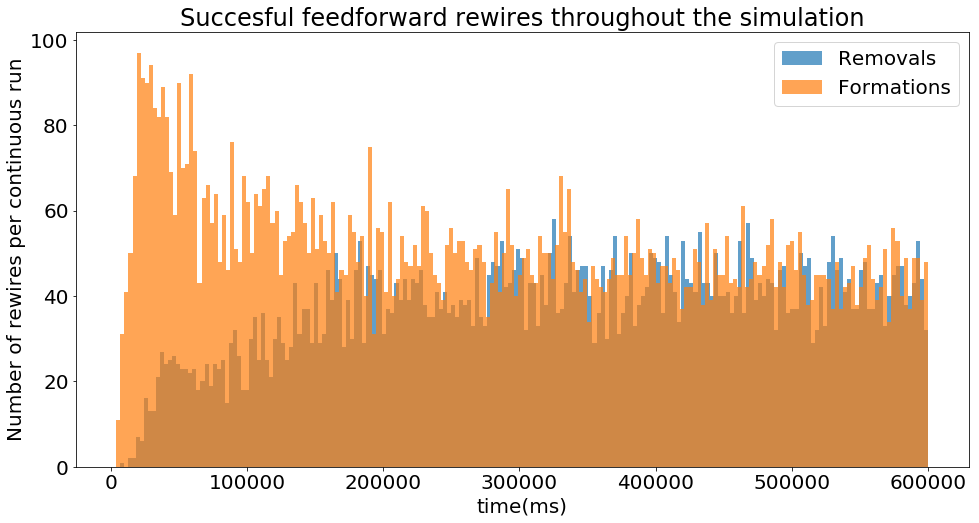

In [178]:
f, (ax1) = plt.subplots(1, 1 ,figsize=(16, 8))
ax1.set_title("Succesful feedforward rewires throughout the simulation")
ax1.set_ylabel("Number of rewires per continuous run")
ax1.set_xlabel("time(ms)")
ax1.set_zorder(2)
# ax2.set_ylabel("Number of failures per continuous run")
ax1.hist(removals[removals[:,2]==1][:, -1]  , int(600000/3000), alpha=.7, zorder=8, label="Removals")
ax1.hist(formations[formations[:,2]==1][:, -1], int(600000/3000), alpha=.7, zorder=9, label="Formations")
# ax2.set_zorder(1)

h1, l1 = ax1.get_legend_handles_labels()
ax1.legend(h1, l1, loc='best')
plt.savefig('succesful_rewires_lat.png')

In [ ]:
removals

In [65]:
removals[removals[:,2]==1]

array([[   206,    206,      1,    877],
       [   197,    214,      1,   1150],
       [   214,    214,      1,   1308],
       ..., 
       [   193,    194,      1, 597353],
       [   168,    185,      1, 598145],
       [   171,    188,      1, 599715]])